In [96]:
import requests
import json
from matplotlib import pyplot as plt
from datetime import datetime
import numpy as np
import os

In [97]:
login_url = 'https://vrmapi.victronenergy.com/v2/auth/login'

stats_url = "https://vrmapi.victronenergy.com/v2/installations/436945/stats"

#use your own victron installation id instead of "93772"

loginuname = os.environ['victroname']
loginpwd = os.environ['victronpwd']


login_string = '{"username":"' + loginuname + '","password":"' + loginpwd +  '"}'

In [98]:
response = requests.post(login_url , login_string)

token = json.loads(response.text)["token"]

headers = {'X-Authorization': "Bearer " + token }

mystr = str(datetime.timestamp(datetime(2024,6,5)))
startdate = mystr[0:-2]

querystring = {"start":startdate,"interval":"15mins","type":"venus"}


response = requests.get(stats_url, params = querystring, headers=headers)



In [99]:
response.json()['records'].keys()

dict_keys(['Pdc', 'bs', 'tsT', 'ac_loads', 'consumption', 'consumption_input', 'consumption_output', 'solar_yield', 'hub_inverter', 'from_to_grid', 'ac_in', 'ac_out', 'ac_genset', 'total_solar_yield', 'dc', 'evp'])

In [100]:
bs_times = np.array([datetime.fromtimestamp(val[0]/1000) for val in response.json()['records']['bs']])
battery_state = np.array([val[2] for val in response.json()['records']['bs']]) 

sy_times = np.array([datetime.fromtimestamp(val[0]/1000) for val in response.json()['records']['total_solar_yield']])
solar_yield = np.array([val[1] for val in response.json()['records']['total_solar_yield']])

Pdc_times = np.array([datetime.fromtimestamp(val[0]/1000) for val in response.json()['records']['Pdc']])
Pdc = np.array([val[1] for val in response.json()['records']['Pdc']])

#bv_times = np.array([datetime.fromtimestamp(val[0]/1000) for val in response.json()['records']['bv']])
#bv = np.array([val[1] for val in response.json()['records']['bv']])

ac_times = np.array([datetime.fromtimestamp(val[0]/1000) for val in response.json()['records']['ac_loads']])
ac_loads = np.array([val[1] for val in response.json()['records']['ac_loads']])

tst_times = np.array([datetime.fromtimestamp(val[0]/1000) for val in response.json()['records']['tsT']])
tst = np.array([val[1] for val in response.json()['records']['tsT']])





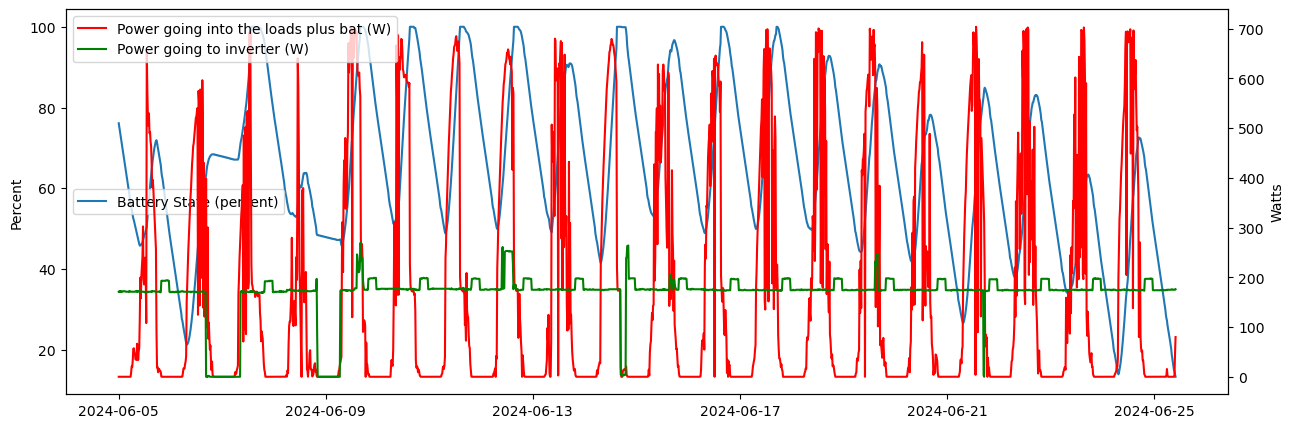

In [101]:
fm = plt.figure(figsize=[15,5])
plt.plot(bs_times, battery_state, label = 'Battery State (percent)')
plt.ylabel('Percent')
ax1 = plt.gca()

tx = plt.twinx()
plt.plot(Pdc_times, Pdc, 'r-', label = 'Power going into the loads plus bat (W)')
plt.plot(ac_times, ac_loads, 'g-', label = 'Power going to inverter (W)')

plt.ylabel('Watts')
plt.legend(loc=2)
ax1.legend(loc=6).set_zorder(51) 

Text(0, 0.5, 'Temperature C')

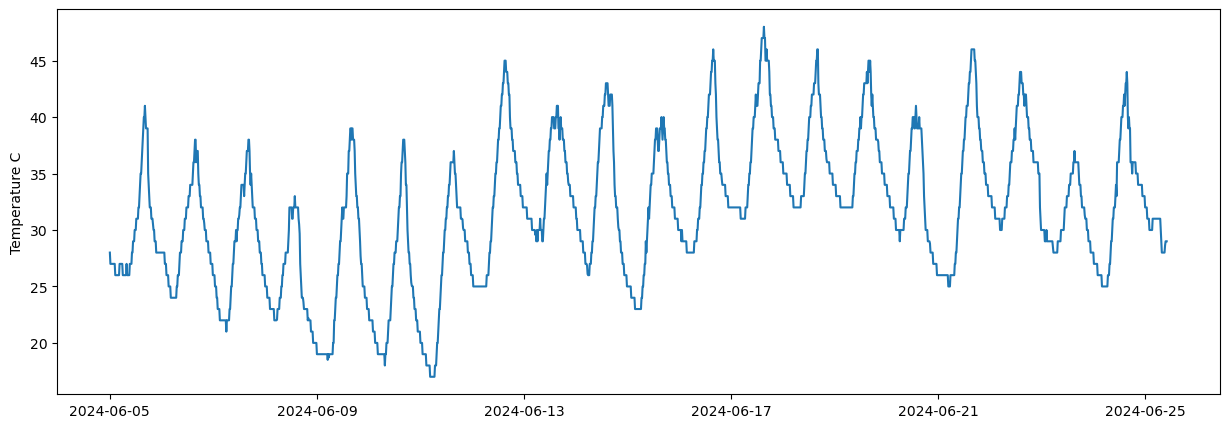

In [102]:
fm = plt.figure(figsize=[15,5])

plt.plot(tst_times, tst)
plt.ylabel('Temperature C')